### Deciphering the Generating Rules and Functionalities of Complex Networks

Author X. Xiao, H. Chen, P. Bogdan

Nov. 25 2021

https://www.nature.com/articles/s41598-021-02203-4


# Quick Start Guide

In [1]:
# init
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import NMFA

In [2]:
# generate graph
label = ['p=0.01', 'p=0.1', 'p=1', ]
p_list = [0.01, 0.1, 1]

net_list = []
for p in p_list:
    G = nx.watts_strogatz_graph(1000,4,p)
    max_sub = max(nx.connected_components(G), key=len) ## VERY IMPORTANT
    while len(max_sub)<1000:
        print("retry,", len(max_sub), p)
        G = nx.watts_strogatz_graph(1000,4,p)
        max_sub = max(nx.connected_components(G), key=len)
    net_list.append(G)

In [3]:
# calculate tau
ntauls_list = []
for curNet in net_list:
    ntauls = NMFA.nfd(curNet)
    ntauls_list.append(ntauls)

100%|██████████| 1000/1000 [00:02<00:00, 357.68it/s]


The asymmetry of network p=0.01 is 0.6427191080674047
The asymmetry of network p=0.1 is -0.4199945597569701
The asymmetry of network p=1 is -0.05074180345936223


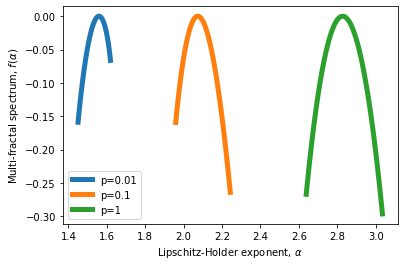

In [4]:
# calculate alph, f(a) and asymmetry, and draw spectrum
for i in range(len(ntauls_list)):
    a,f,asymmetry = NMFA.nspectrum(ntauls_list[i],name=label[i])
    print("The asymmetry of network p={} is {}".format(p_list[i], asymmetry))

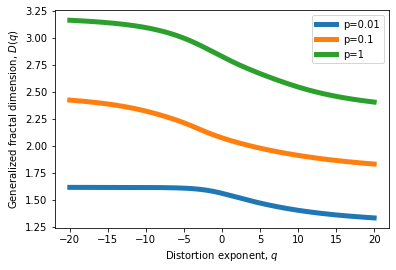

In [5]:
# calculate and draw generalized fractal dimension
ndim_list = []
for i in range(len(ntauls_list)):
    dim, _ = NMFA.ndimension(ntauls_list[i],name=label[i])
    ndim_list.append(dim)

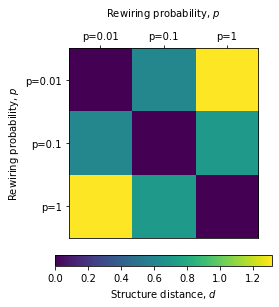

In [6]:
# calculate and draw structure distance
dist = NMFA.distance(ndim_list)

fig, ax = plt.subplots()
im = ax.imshow(dist)

ax.set_xticks([0,1,2])
ax.set_yticks([0,1,2])
ax.set_xticklabels(label)
ax.set_yticklabels(label)
ax.tick_params(top=True, bottom=False,labeltop=True, labelbottom=False)
ax.set_ylabel(r'Rewiring probability, $p$')
ax.set_xlabel(r'Rewiring probability, $p$',labelpad=15)
ax.xaxis.set_label_position('top')

cbarlabel = 'Structure distance, $d$'
cbar = ax.figure.colorbar(im, ax=ax, orientation="horizontal",fraction=0.05,pad=0.08)
cbar.ax.set_xlabel(cbarlabel)
ax.grid(False)

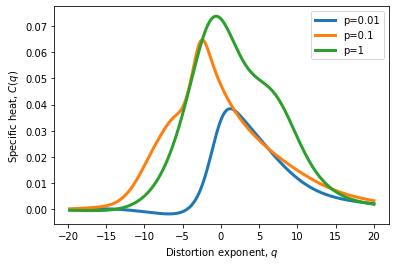

In [8]:
# calculate and draw specific heat
for i in range(len(ntauls_list)):
    heat1, q_list = NMFA.nheat(ntauls_list[i])
    plt.plot(q_list,heat1,label=label[i],linewidth=3)
plt.grid(False)
plt.xlabel('Distortion exponent, $q$')
plt.ylabel('Specific heat, $C(q)$')
plt.legend()